In [2]:
#----------------------------------------------- PART 1 ------------------------------------------------------

In [3]:
import tensorflow as tf

sess = tf.Session()
#1.Read arrays x and y containing floating numbers
array_x = tf.constant([1.0,2.0,3.0], name = 'x')
array_y = tf.constant([2.0,3.0,4.0], name = 'y')


In [5]:
#2. Calculate mean of x and y
mean_x = tf.reduce_mean(array_x)
mean_y = tf.reduce_mean(array_y)

In [7]:
#3. Calucate variance of x
#variance(x)=sum((x-mean(x))^2)
with tf.name_scope("Variance_X"):
    sq_x = tf.square(array_x - mean_x)

    add_x = tf.reduce_sum(sq_x)

    #get size of the array
    n = (array_x.get_shape())
    n = tf.to_float(n)
    #print(n)

    variance_x = tf.div(add_x,n,name="Variance_x")
    
    #writer = tf.summary.FileWriter("/tmp/tboard/l1a2_pa", sess.graph)
    print(sess.run(variance_x))
    #writer.close()

[ 0.66666669]


In [9]:
#4. Calculate covariance of x and y
#covariance = sum((x(i) - mean(x)) * (y(i) - mean(y)))

with tf.name_scope("Covariance"):
    co_x_y=0.0
    
    for i in range(len(sess.run(array_x))):
        co_x_y = tf.add(co_x_y,tf.multiply(tf.subtract(array_x[i],mean_x),tf.subtract(array_y[i],mean_y)))

In [11]:
#5. m=covariance(x,y)/variance(x) 
with tf.name_scope("m"):
    m = tf.div(co_x_y,variance_x,name="m")

In [13]:
#6. c=mean(y)-m*mean(x)
with tf.name_scope("c"):
    c = tf.subtract(mean_y,tf.multiply(m,mean_x))

In [15]:
# y = mx + c
with tf.name_scope("Linear_model"):
    y = tf.add(tf.multiply(m,array_x),c)

In [17]:
#Printing the values
print("Mean of x = ",sess.run(mean_x))
print("Mean of y = ",sess.run(mean_y))
print("Variance of x = ",sess.run(variance_x))
print("Covariance(x,y) = ",sess.run(co_x_y))
print("Slope,m = ",sess.run(m))
print("Constant,c = ",sess.run(c))
    
print("y = mx + c = ",sess.run(y))

Mean of x =  2.0
Mean of y =  3.0
Variance of x =  [ 0.66666669]
Covariance(x,y) =  2.0
Slope,m =  [ 3.]
Constant,c =  [-3.]
y = mx + c =  [ 0.  3.  6.]


In [19]:
#----------------------------------------------- PART 2 -----------------------------------------------------

Array y :  [ 2.  3.  4.]
Predicted y :  [ 0.  3.  6.]


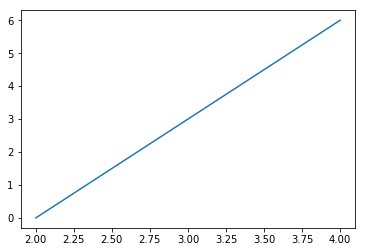

In [21]:
import matplotlib.pyplot  as plt

#1. Plot graph for actual values against predicted value
print("Array y : ",sess.run(array_y))
print("Predicted y : ",sess.run(y))

#plotting the graph
plt.plot(sess.run(array_y),sess.run(y))
#plt.axis(0,7,0,8)
plt.show()

In [22]:
#2. Calculate root mean square error.
rmse = tf.sqrt(tf.reduce_sum(tf.pow(y-array_y, 2))/(len(sess.run(array_x))))
print("Root mean square error:",sess.run(rmse))

Root mean square error: 1.63299
